**Accidents in Barcelona**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('accidents_2017.csv')

In [3]:
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


**Values in columns**

In [4]:
for i in df.columns.drop('Id'):
    print(i)
    print(df[i].value_counts())
    print('')

District Name
Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

Neighborhood Name
la Dreta de l'Eixample             1167
l'Antiga Esquerra de l'Eixample     588
la Nova Esquerra de l'Eixample      387
Sant Gervasi - Galvany              385
la Sagrada Família                  377
                                   ... 
Can Baró                             15
Ciutat Meridiana                     11
Can Peguera                           8
Vallbona                              8
Torre Baró                            7
Name: Neighborhood Name, Length: 74, dtype: int64

Street
Corts Catalanes                                       219
Diagonal                                              176
Litoral (Ll

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10339 non-null  object 
 1   District Name      10339 non-null  object 
 2   Neighborhood Name  10339 non-null  object 
 3   Street             10339 non-null  object 
 4   Weekday            10339 non-null  object 
 5   Month              10339 non-null  object 
 6   Day                10339 non-null  int64  
 7   Hour               10339 non-null  int64  
 8   Part of the day    10339 non-null  object 
 9   Mild injuries      10339 non-null  int64  
 10  Serious injuries   10339 non-null  int64  
 11  Victims            10339 non-null  int64  
 12  Vehicles involved  10339 non-null  int64  
 13  Longitude          10339 non-null  float64
 14  Latitude           10339 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


**Accidents with 1 or more serious injuries**

In [6]:
m = folium.Map(location=[41.38879, 2.15899])

victims = df[df['Serious injuries']>=1].reset_index()

for i in range(len(victims)):
    folium.Marker([victims['Latitude'][i], victims['Longitude'][i]], popup=victims['Victims'][i]).add_to(m)
    
m

**number of vehicles involved per neighbourhood**

In [7]:
data_m1 = df.groupby(by='Neighborhood Name').agg({'Vehicles involved':'sum'})
data_m1['Neighborhood Name'] = data_m1.index

In [8]:
geo = 'neighbourhoods.geojson'
data = data_m1

m1 = folium.Map(location=[41.38879, 2.15899])

folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=data,
    columns=['Neighborhood Name','Vehicles involved'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Vehicles involved'
).add_to(m1)

m1

**Total number of victims involved per neighbourhood**

In [9]:
data_m2 = df.groupby(by='Neighborhood Name').agg({'Victims':'sum'})
data_m2['Neighborhood Name'] = data_m1.index

In [10]:
geo = 'neighbourhoods.geojson'
data = data_m2

m2 = folium.Map(location=[41.38879, 2.15899])

folium.Choropleth(
    geo_data=geo,
    name='choropleth',
    data=data,
    columns=['Neighborhood Name','Victims'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Victims'
).add_to(m2)

m2

**Elimination of some columns**

In [11]:
df = df[['District Name','Weekday','Part of the day','Month','Day','Mild injuries','Serious injuries','Victims',
         'Vehicles involved']]
df.head()

,District Name,Weekday,Part of the day,Month,Day,Mild injuries,Serious injuries,Victims,Vehicles involved
0,Unknown,Friday,Morning,October,13,2,0,2,2
1,Unknown,Friday,Morning,September,1,2,0,2,2
2,Unknown,Friday,Afternoon,December,8,5,0,5,2
3,Unknown,Friday,Night,July,21,1,0,1,2
4,Sant Martí,Thursday,Afternoon,May,25,1,0,1,3


In [12]:
df = df[df['District Name'] != 'Unknown']

**Total victims and vehicles involved per month and weekday**

In [13]:
dfpivot = pd.pivot_table(df, values=['Victims','Vehicles involved'], index=['Month'],
            aggfunc='sum')

dfpivot = dfpivot.sort_values(by=(['Victims']), ascending=False)

dfpivot

,Vehicles involved,Victims
Month,,
November,1877,1209
July,1744,1099
March,1825,1087
May,1834,1086
June,1754,1082
October,1739,1070
January,1641,987
September,1453,953
February,1576,941


In [14]:
dfpivot = pd.pivot_table(df, values=['Victims','Vehicles involved'], index=['Weekday'],
            aggfunc='sum')

dfpivot = dfpivot.sort_values(by=(['Victims']), ascending=False)

dfpivot

,Vehicles involved,Victims
Weekday,,
Friday,3379,2017
Thursday,3218,1979
Tuesday,3230,1978
Wednesday,3200,1899
Monday,2883,1751
Saturday,2215,1442
Sunday,1686,1080


**Transformation of categorical variables into numerical ones**

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data = le.fit_transform(df['Part of the day'])
df['Part of the day'] = data

In [16]:
data1 = le.fit_transform(df['Weekday'])
df['Weekday'] = data1

In [17]:
data2 = le.fit_transform(df['Month'])
df['Month'] = data2

In [18]:
data3 = le.fit_transform(df['District Name'])
df['District Name'] = data3

In [19]:
df.describe()

,District Name,Weekday,Part of the day,Month,Day,Mild injuries,Serious injuries,Victims,Vehicles involved
count,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000,10312.000000
mean,4.231575,3.054306,0.623545,5.699961,15.774147,1.153413,0.023274,1.177851,1.921160
std,3.104756,2.116058,0.682050,3.371707,8.763263,0.740851,0.163731,0.733782,0.714027
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,8.000000,1.000000,0.000000,1.000000,2.000000
50%,4.000000,3.000000,1.000000,6.000000,16.000000,1.000000,0.000000,1.000000,2.000000
75%,7.000000,5.000000,1.000000,9.000000,23.000000,1.000000,0.000000,1.000000,2.000000
max,9.000000,6.000000,2.000000,11.000000,31.000000,10.000000,4.000000,10.000000,14.000000


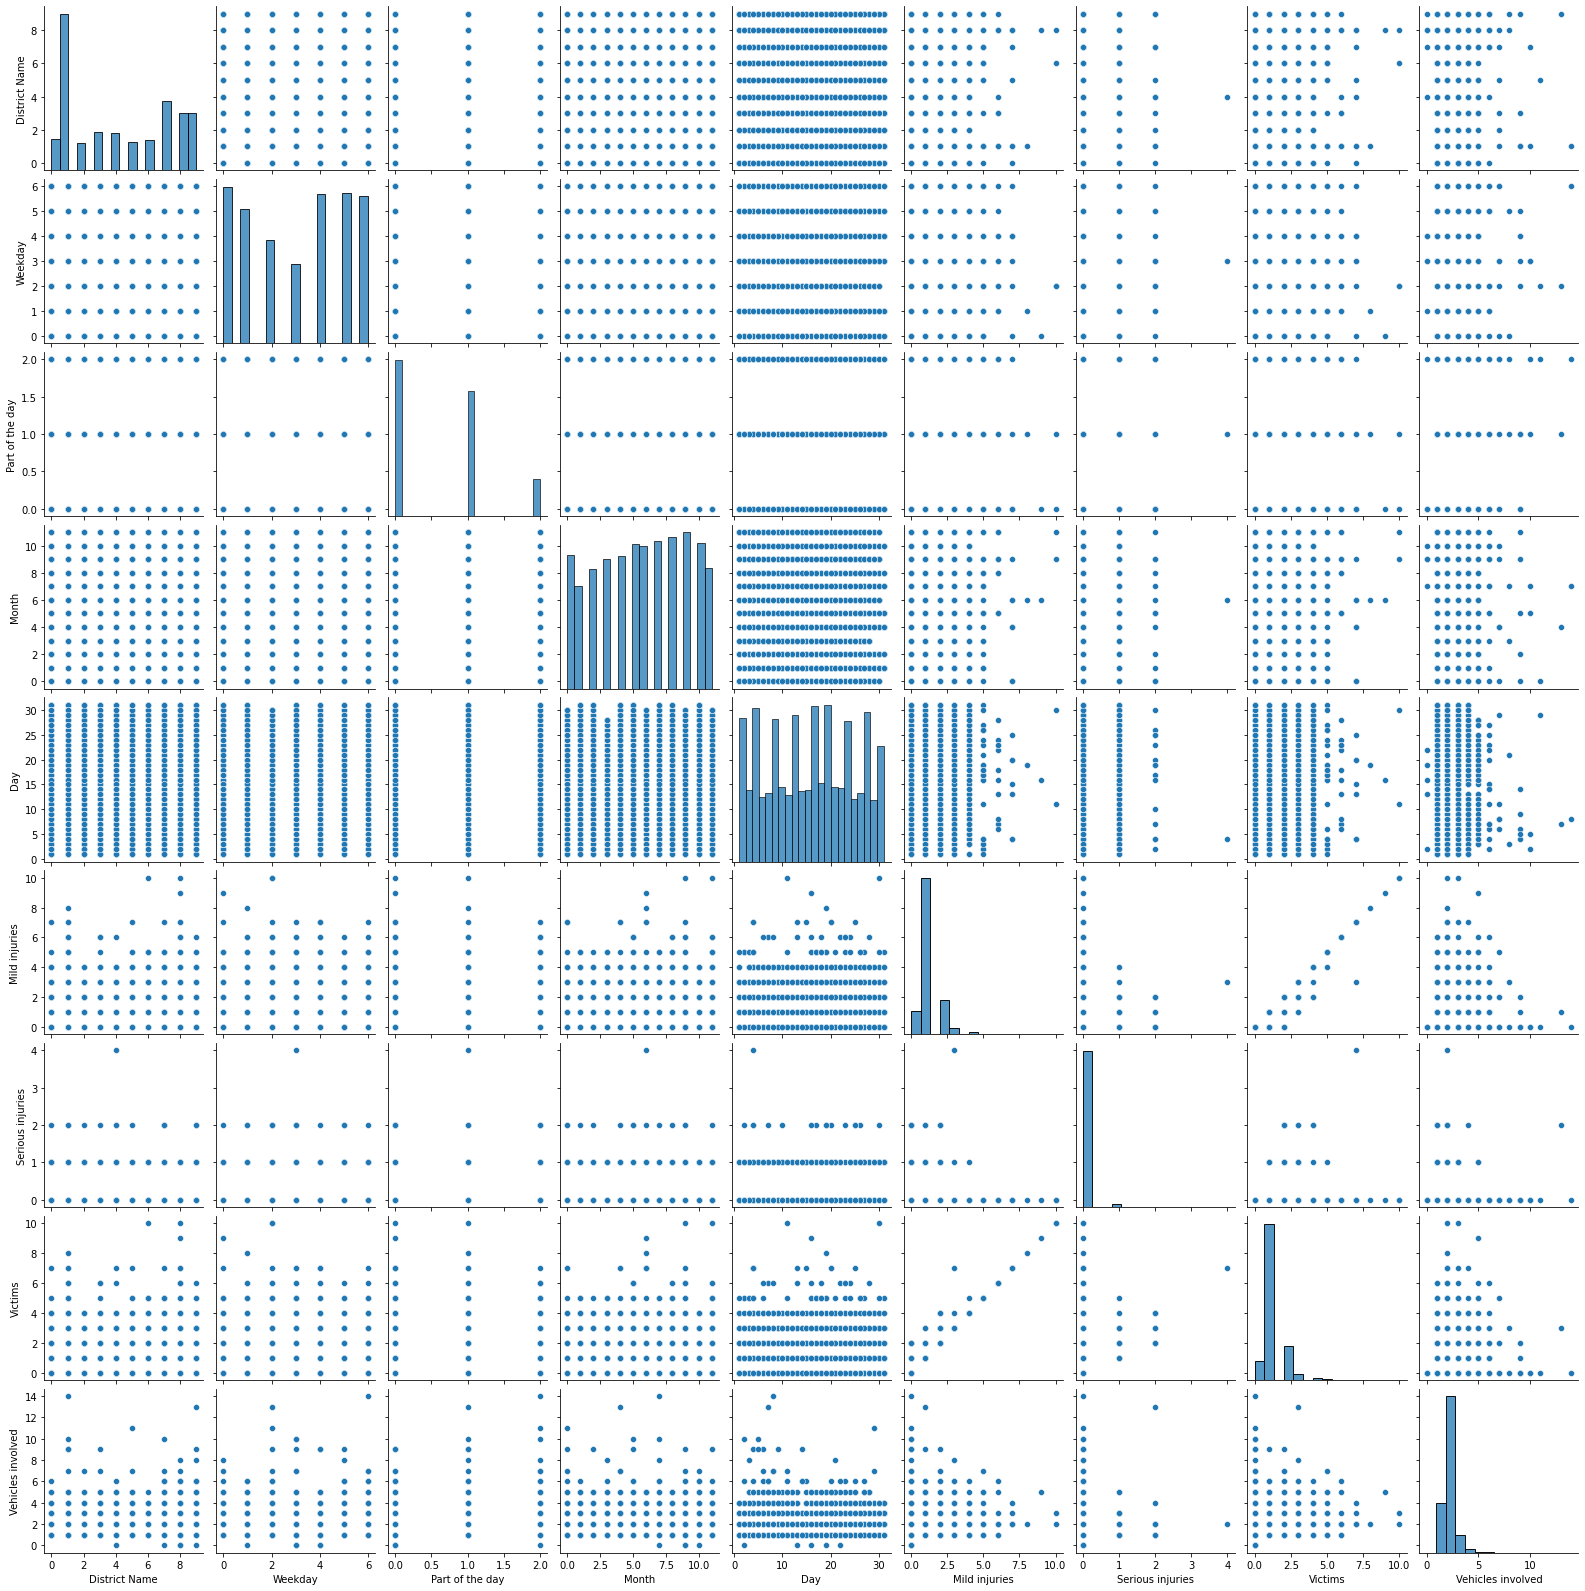

In [20]:
sns.pairplot(df);

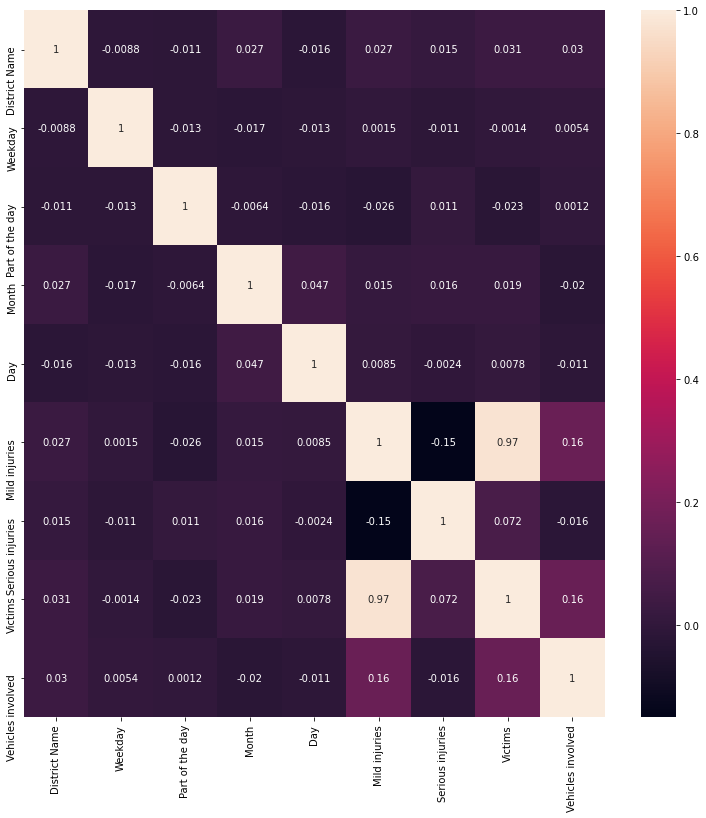

In [21]:
plt.figure(figsize=(13,13))
corr = df.corr()
sns.heatmap(corr,annot=True);

*High correlation between 'mild injuries' and 'victims'. Therefore, we drop 'mild injuries'*

In [22]:
df.drop(['Mild injuries','Day'],axis = 1, inplace=True)

In [23]:
df

,District Name,Weekday,Part of the day,Month,Serious injuries,Victims,Vehicles involved
4,7,4,0,8,0,1,3
5,7,6,1,11,0,1,2
6,7,2,0,8,0,1,2
7,7,5,0,2,0,2,1
8,7,1,0,6,0,1,1
...,...,...,...,...,...,...,...
10334,6,5,1,0,0,1,3
10335,6,6,1,7,0,1,2
10336,6,4,1,2,0,1,2
10337,6,0,0,5,0,1,2


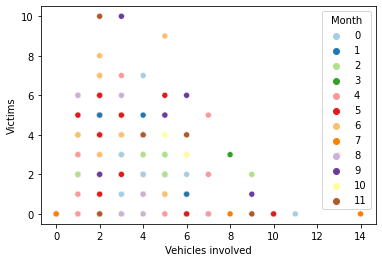

In [24]:
sns.scatterplot(data = df, x = 'Vehicles involved', y = 'Victims', hue = 'Month', palette=sns.color_palette("Paired"));

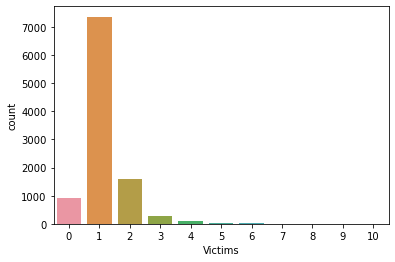

In [25]:
sns.countplot(x=df['Victims']);

**Categorization of number of victims (no victims = 0 or victims = 1)**

In [26]:
def change(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

df['Class'] = df['Victims'].apply(change)

In [27]:
df['Class'].value_counts()

1    9411
0     901
Name: Class, dtype: int64

*Highly imbalanced classes*

In [28]:
X = np.array(df.drop(['Victims','Class'],axis=1))
y = df['Class'].values

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [30]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train,y_train = smt.fit_resample(X_train,y_train)

In [31]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7847446670976083

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.7889463477698772

In [33]:
for i in range(len(df.columns.drop(['Victims','Class']))):
    print(df.columns.drop(['Victims','Class'])[i],clf1.feature_importances_[i])
    print("")

District Name 0.22436496211610257

Weekday 0.16707210800627748

Part of the day 0.0632756303918901

Month 0.26764785350864906

Serious injuries 0.015612998592208159

Vehicles involved 0.26202644738487274



In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score

print(confusion_matrix(y_test,clf1.predict(X_test)))
print('')
print(recall_score(y_test,clf1.predict(X_test)))
print('')
print(precision_score(y_test,clf1.predict(X_test)))
print('')
print(balanced_accuracy_score(y_test,clf1.predict(X_test)))

[[  93  176]
 [ 477 2348]]

0.8311504424778761

0.93026941362916

0.5884376747705365
